In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fake_job_postings.csv")

In [28]:
contains_links = df["company_profile"].apply(lambda x: "#" in x)

KeyError: 2344

In [4]:
df.groupby("company_profile", dropna = False)["fraudulent"].apply(lambda x: x.mean() not in [1,0]).sum()

1

In [5]:
no_profile = df["fraudulent"][df["company_profile"].isna()]
no_profile.mean()

0.17744860943168078

In [17]:
def column_info(target_column, display = True):
    '''Prints some Key Information about Each Column'''
    n = len(target_column)
    n_unique_values = len(target_column.value_counts()==1)
    n_unique_entries = sum(target_column.value_counts()==1)
    n_na = target_column.isna().sum()
    lengths = target_column.fillna("").apply( lambda x: len(x.split()) )
    if(display == True):
        print("Percent of Entries that are Unique: {:.2%}".format(n_unique_entries/n))
        print("Percent of NA: {:.2%}".format(n_na/n))
        print("Average Length of Entry: {:.2f}".format( lengths.mean() ))
        plt.hist(lengths)
        plt.title("Word Length of Entries")

Unfraudulent Entries
Percent of Entries that are Unique: 86.43%
Percent of NA: 0.00%
Average Length of Entry: 379.49


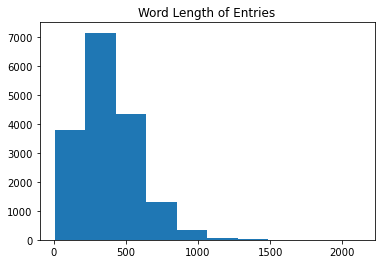

In [18]:
print("Unfraudulent Entries")
column_info(df["full_listing"][df["fraudulent"] == 0])

Fraudulent Entries
Percent of Entries that are Unique: 78.64%
Percent of NA: 0.00%
Average Length of Entry: 282.33


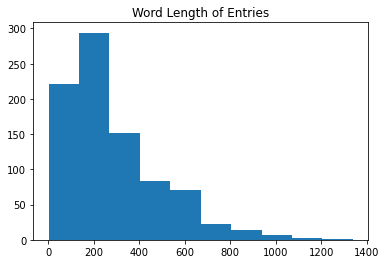

In [19]:
print("Fraudulent Entries")
column_info(df["full_listing"][df["fraudulent"] == 1])

In [9]:
#Longest Entry
df.loc[df["requirements"].fillna("").apply( lambda x: len(x.split()) ).idxmax()]["requirements"]

"Our client based in the far North of NZ is seeking a Gastroenterologist.The region boasts more artists per head of population than any other in New Zealand. All in all there are over 1,000 professional artists in Northland, art events and workshops are spread throughout the year.The region also has strong farming, tourism, marine engineering, creative, forestry and wood processing industries which have resulted in a growing commercial centre.There are not many other cities in New Zealand where you can see native and protected bush from nearly every point in the town centre. A number of 1,000 year old Kauri trees have survived in some places.A short distance from Whangarei are the scenic Tutukaka Coast and the Whangarei Heads with dozens of gorgeous bays and beaches, from sheltered sandy coves to calm harbour bays and wild surf beaches, all within 30 minutes drive from town. The National Geographic Traveller magazine has rated 99 of the world's great islands and coastlines for sustaina

In [10]:
type(df["requirements"])

pandas.core.series.Series

In [11]:
df["requirements"].apply(type).value_counts()

<class 'str'>      15185
<class 'float'>     2695
Name: requirements, dtype: int64

In [12]:
df["requirements"].isna().sum()

2695

In [14]:
import random
fraudulent = df[df["fraudulent"] == 1]
unfraudulent = df[df["fraudulent"] == 0]
print(len(fraudulent))
print(fraudulent["requirements"].iloc[random.randint(0,len(fraudulent))])


866
General Qualifications:Excellent communication skills is required.Must have a desire to learn, work in a team environment, and have a winning attitude. Experience in Project Controls is Required:Project Control Professional - 10+ years experienceProject Control Specialist - 5 to 10 years experience * Project Control Tech - 1 to 10 years experience Software Experience: * MS Project, preferredPrimavera a plus, but not requiredMicrosoft OfficeExcelWord Experience Preferred: Project control for small and big projects from conception to the construction.


In [15]:
len(df)

17880

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
nlp("").similarity(nlp(""))

1.0

In [18]:
nlp("I like planes").similarity(nlp("Airplanes in the night sky"))

<ipython-input-18-1b7e5dac7bc7>:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  nlp("I like planes").similarity(nlp("Airplanes in the night sky"))


0.1718760010106311

In [19]:
# Creates similarity matrix
nlp_requirements = df["requirements"].fillna("").apply(nlp)

In [8]:
sim = np.zeros( (len(nlp_requirements), len(nlp_requirements)) )
for i in range(len(nlp_requirements)):
    for j in range(i,len(nlp_requirements)):
        sim[i,j] = sim[j,i] = nlp_requirements[i].similarity(nlp_requirements[j])

NameError: name 'nlp_requirements' is not defined

In [50]:
1-sim
pd.DataFrame(sim).to_csv("SimilarityMatrix.csv")

In [51]:
from sklearn.cluster import KMeans
kmeans_dic = {}
errors = []
for k in range(2,20):
    kmeans_dic[k] = KMeans(k).fit(1-sim)
    errors.append(kmeans_dic[k].inertia_)

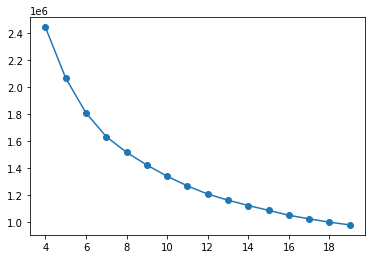

In [70]:
plt.plot(range(4,len(errors)+2),errors[2:], "o-")

In [121]:
n = 10
for i in range(n):
    print("Cluster {}: {:.2%}".format(i,df["fraudulent"][kmeans_dic[n].labels_ == i].mean()))
df.loc[kmeans_dic[n].labels_ == 0]["requirements"]

Cluster 0: 5.71%
Cluster 1: 4.21%
Cluster 2: 8.71%
Cluster 3: 2.89%
Cluster 4: 2.30%
Cluster 5: 6.58%
Cluster 6: 17.26%
Cluster 7: 0.63%
Cluster 8: 8.86%
Cluster 9: 5.46%


5        NaN
18       NaN
24       NaN
28       NaN
37       NaN
        ... 
17852    NaN
17854    NaN
17864    NaN
17868    NaN
17874    NaN
Name: requirements, Length: 2695, dtype: object

In [91]:
df["requirements"]

0        Experience with content management systems a m...
1        What we expect from you:Your key responsibilit...
2        Implement pre-commissioning and commissioning ...
3        EDUCATION: Bachelor’s or Master’s in GIS, busi...
4        QUALIFICATIONS:RN license in the State of Texa...
                               ...                        
17875    To ace this role you:Will eat comprehensive St...
17876    - B.A. or B.S. in Accounting- Desire to have f...
17877    At least 12 years professional experience.Abil...
17878    1. Must be fluent in the latest versions of Co...
17879    We want to hear from you if:You have an in-dep...
Name: requirements, Length: 17880, dtype: object

In [31]:
df_field = pd.DataFrame()
for i in range(n):
    

<ipython-input-31-5b3cbeef2c30>:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  nlp_requirements[0].similarity(nlp_requirements[501])


0.7284731528188458

In [32]:
nlp_requirements[0]

Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours

In [136]:
def lift(industry, i):
    length = len(df)
    n_i = sum(df["cluster"] == i)
    if(n_i ==0):
        print("error #i = 0", i)
    n_industry = df["industry"].value_counts(dropna = False)[industry]
    if(n_industry ==0):
        print("error #industry = 0", industry)
    if(type(industry) != type("")):
        n_i_industry = ((df["cluster"] == i) & (df["industry"].isna())).sum()
    else:
        n_i_industry = sum((df["cluster"] == i) & (df["industry"] == industry))
    return n_i_industry * length / (n_i * n_industry)
    

df_lifts = {}
for industry in df["industry"].unique():
    listings = df[df["industry"] == industry]
    df_lifts[industry] = ([ lift(industry,i) for i in range(n)])
df_lifts = pd.DataFrame(df_lifts)

In [123]:
df["cluster"] = kmeans_dic[n].labels_

In [137]:
df_lifts

,NaN,Marketing and Advertising,Computer Software,Hospital & Health Care,Online Media,Information Technology and Services,Financial Services,Management Consulting,Events Services,Internet,...,Individual & Family Services,Public Policy,Nanotechnology,Museums and Institutions,Fishery,Plastics,Furniture,Shipbuilding,Alternative Dispute Resolution,Ranching
0,1.863291,0.841333,0.713595,1.415006,1.445140,0.723138,0.511002,1.582075,0.000000,0.312359,...,0.000000,4.423006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.745557,1.144308,1.439356,0.860961,0.484184,1.639251,1.051499,0.940434,0.244513,1.208750,...,0.679202,0.000000,0.000000,6.112821,3.056410,2.037607,0.000000,6.112821,0.000000,0.000000
2,1.332218,0.798377,0.617681,1.203418,0.623344,0.517386,0.404093,0.000000,1.259155,0.904054,...,0.000000,0.000000,15.739437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.905680,1.017872,1.007659,0.382916,1.435618,0.815297,1.326196,1.185075,2.718702,1.356791,...,1.006927,3.020781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.733541,1.172789,1.116454,0.951086,1.526118,0.980770,2.011642,0.909019,1.438621,1.354633,...,1.141762,0.000000,0.000000,0.000000,2.568966,0.000000,3.425287,0.000000,5.137931,5.137931
5,0.947469,1.038527,1.257038,0.795486,0.978605,1.311015,0.812029,1.140452,0.593035,1.060985,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.294638,3.294638,0.000000,0.000000,0.000000
6,1.591740,1.477128,0.634895,1.289037,0.576644,0.403052,0.224292,0.448008,0.000000,0.383886,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.082361,0.135472,0.032608,0.406252,0.000000,0.064689,0.057597,0.000000,0.000000,0.063373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.067102,1.217391,0.715116,1.786720,0.475248,1.619377,0.246470,0.184615,1.440000,0.994350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.875002,0.954736,1.065097,1.304639,0.703546,0.881055,0.786748,1.503153,1.598808,1.120738,...,4.934592,0.000000,0.000000,0.000000,0.000000,2.960755,0.000000,0.000000,0.000000,0.000000


In [143]:
df_lifts.loc[6].sort_values()

Program Development                  0.000000
Law Practice                         0.000000
Motion Pictures and Film             0.000000
Renewables & Environment             0.000000
Fund-Raising                         0.000000
                                      ...    
Investment Management                9.706840
Transportation/Trucking/Railroad     9.889988
Capital Markets                     11.648208
Maritime                            19.413681
Military                            29.120521
Name: 6, Length: 132, dtype: float64

In [129]:
(df["industry"].isna() & (df["cluster"] == 0)).sum()

1377

In [160]:
ind = df.groupby("industry")["fraudulent"].apply(lambda x: (x.sum() + df["fraudulent"].mean() * 5)/(len(x)+5)).sort_values(ascending = False).head(10).index

In [161]:
df_lifts[ind]

,Oil & Energy,Accounting,"Leisure, Travel & Tourism",Computer Networking,Animation,Ranching,Military,Executive Office,Defense & Space,Hospitality
0,0.277401,2.086323,0.087296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527745
1,1.746520,0.461345,0.563023,2.639627,0.000000,0.000000,0.000000,0.764103,3.396011,0.486247
2,0.383889,1.088892,0.828391,0.000000,3.147887,0.000000,0.000000,1.967430,0.000000,1.788572
3,0.378913,1.082921,1.073172,0.617887,0.000000,0.000000,0.000000,1.132793,0.000000,1.647698
4,0.608675,0.678595,0.946461,0.467085,0.000000,5.137931,2.568966,1.284483,1.141762,0.583856
5,1.239794,0.932445,4.161648,1.347806,3.953566,0.000000,0.000000,0.000000,0.000000,1.123172
6,0.202930,0.732592,1.532659,0.000000,0.000000,0.000000,29.120521,0.000000,0.000000,1.985490
7,0.000000,0.282190,0.295186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.250871,1.056604,0.631579,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.545455
9,3.094866,1.117266,0.467488,2.220566,3.552906,0.000000,0.000000,3.330849,1.973837,2.321501


In [162]:
ind

Index(['Oil & Energy', 'Accounting', 'Leisure, Travel & Tourism',
       'Computer Networking', 'Animation', 'Ranching', 'Military',
       'Executive Office', 'Defense & Space', 'Hospitality'],
      dtype='object', name='industry')

In [163]:
len(df)

17880

In [170]:
df2 = pd.read_csv("fj.csv").drop("Unnamed: 0", axis = 1)

In [178]:
print(df2["posting"][1])

customer service - cloud video production success 90 seconds, the worlds cloud video production service.90 seconds is the worlds cloud video production service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#url_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. with a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 seconds provides a 100% success guarantee.90 seconds has produced almost 4,000 videos in over 30 countries for over 500 global brands including some of the worlds largest including paypal, 

In [6]:
df_sim = pd.read_csv("SimilarityMatrix.csv")

In [9]:
df_sim = df_sim.drop("Unnamed: 0", axis =1 )

In [10]:
df_sim

,0,1,2,3,4,5,6,7,8,9,...,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879
0,1.000000,0.666362,0.727815,0.857744,0.768074,0.0,0.850061,0.789108,0.460402,0.709795,...,0.764101,0.547689,0.731088,0.783398,0.0,0.815171,0.785245,0.687669,0.641592,0.690650
1,0.666362,1.000000,0.743550,0.784030,0.638032,0.0,0.724753,0.617480,0.396166,0.752398,...,0.679674,0.631916,0.753379,0.761774,0.0,0.738222,0.797344,0.784427,0.630323,0.760379
2,0.727815,0.743550,1.000000,0.789209,0.697441,0.0,0.760134,0.677463,0.389699,0.731884,...,0.674036,0.722860,0.699490,0.803678,0.0,0.803378,0.751254,0.789009,0.678477,0.748310
3,0.857744,0.784030,0.789209,1.000000,0.801656,0.0,0.868648,0.796767,0.440971,0.811072,...,0.845640,0.681649,0.773856,0.868444,0.0,0.797301,0.795921,0.734231,0.658356,0.683836
4,0.768074,0.638032,0.697441,0.801656,1.000000,0.0,0.793300,0.676554,0.694152,0.809626,...,0.832139,0.629608,0.814572,0.798685,0.0,0.771546,0.783231,0.758586,0.655846,0.629706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.815171,0.738222,0.803378,0.797301,0.771546,0.0,0.758195,0.759757,0.409190,0.712313,...,0.746455,0.636147,0.766366,0.822603,0.0,1.000000,0.769355,0.793086,0.677359,0.840760
17876,0.785245,0.797344,0.751254,0.795921,0.783231,0.0,0.777613,0.611541,0.428543,0.816835,...,0.756237,0.579754,0.851038,0.809460,0.0,0.769355,1.000000,0.826556,0.639159,0.744382
17877,0.687669,0.784427,0.789009,0.734231,0.758586,0.0,0.810372,0.626138,0.557337,0.726519,...,0.712329,0.656049,0.824895,0.807276,0.0,0.793086,0.826556,1.000000,0.671144,0.773077
17878,0.641592,0.630323,0.678477,0.658356,0.655846,0.0,0.718070,0.720001,0.559190,0.593288,...,0.654626,0.762927,0.561305,0.675515,0.0,0.677359,0.639159,0.671144,1.000000,0.626092


In [12]:
from sklearn.manifold import MDS
mds_plot = MDS(dissimilarity = "precomputed")

In [13]:
mds_plot.fit_transform(df_sim.values)

KeyboardInterrupt: 

In [1]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845518 sha256=db12599babe2c22b686fc23dca2eefe82e773d6c93587fd09f33e4aba9a846d5
  Stored in directory: c:\users\noah shimizu\appdata\local\pip\cache\wheels\43\dc\11\ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Jobs").config("spark.driver.memory", "15g").getOrCreate()

In [3]:
spark

In [50]:
df_sim = pd.read_csv("SimilarityMatrix.csv")

In [51]:
df_sim = df_sim.drop("Unnamed: 0", axis = 1)

In [72]:
from sklearn.manifold import (MDS, TSNE)
def create_mds(df, n):
    '''Creates an MDS plot of the first n data points. '''
    df_mini = df.values[:n,  :n]
    mds = MDS(dissimilarity = "precomputed")
    return mds.fit_transform( 1 - df_mini)
    
def create_TSNE(df, n, frac_perplexity):
    '''Creates a TSNE(2) plot of the first n data points and set perplexity = n*frac_perplexity'''
    df_mini = df.values[:n,  :n]
    mds = TSNE(metric = "precomputed", perplexity = n*frac_perplexity)
    return mds.fit_transform( 1 - df_mini)

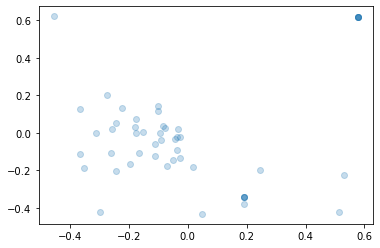

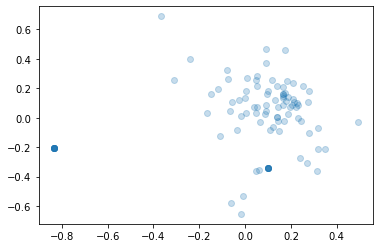

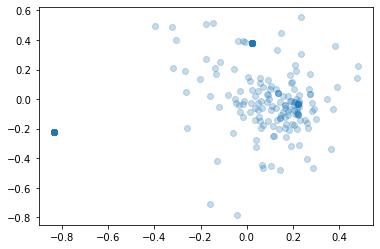

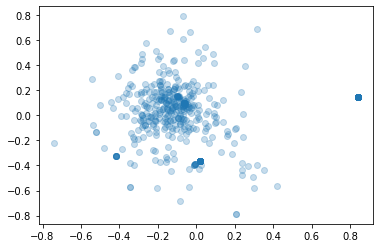

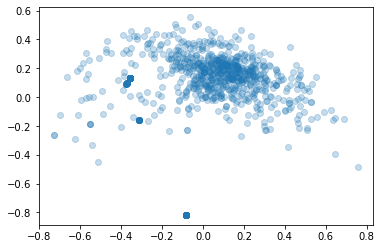

In [44]:
# MDS Plots
for i in [50, 100, 200, 500, 1000]:
    mds = create_mds(df_sim, i)
    fig1, ax1 = plt.subplots()
    ax1.plot(mds[:,0], mds[:,1], 'o', alpha = 0.25)

### Plots are off, due to the empty strings. We fix the issue below

In [49]:
# Creates df_sim_no0, removes the empty string entries for the purpose of better plots
mask = df_sim.apply(lambda x: x.apply( lambda y: y in [0,1]).all())


In [64]:
#df_sim_no0 = df_sim[df_sim.columns[~mask]][~mask]
df_sim.index = [str(i) for i in range(len(df_sim))]
df_sim_no0 = df_sim[df_sim.columns[~mask]][~mask]

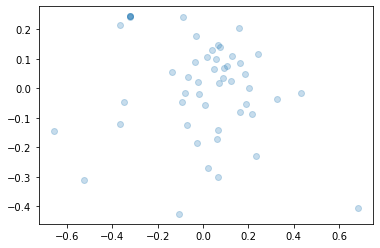

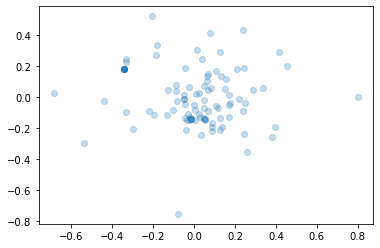

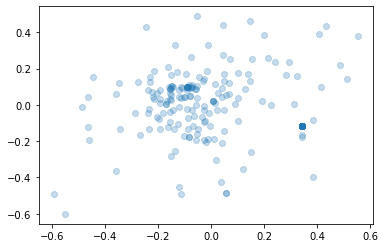

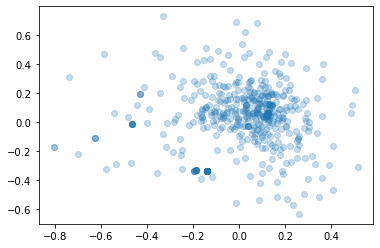

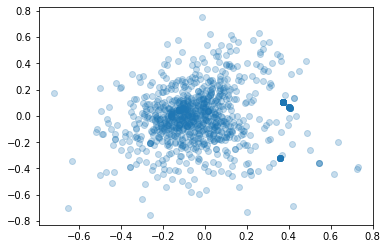

In [65]:
# MDS Plots
for i in [50, 100, 200, 500, 1000]:
    mds = create_mds(df_sim_no0, i)
    fig1, ax1 = plt.subplots()
    ax1.plot(mds[:,0], mds[:,1], 'o', alpha = 0.25)

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from

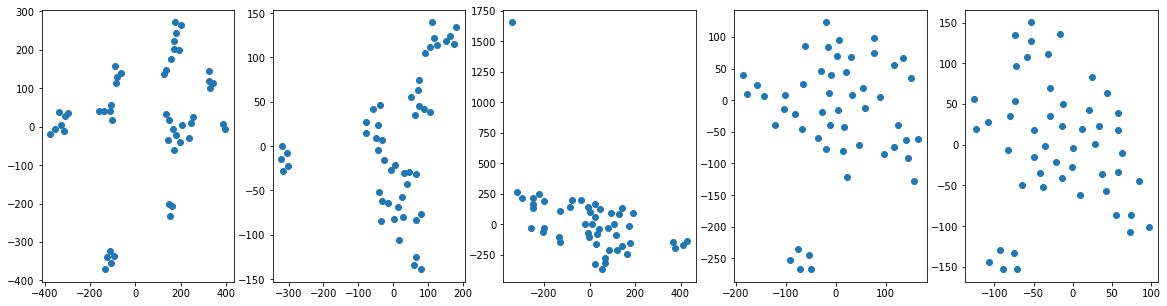

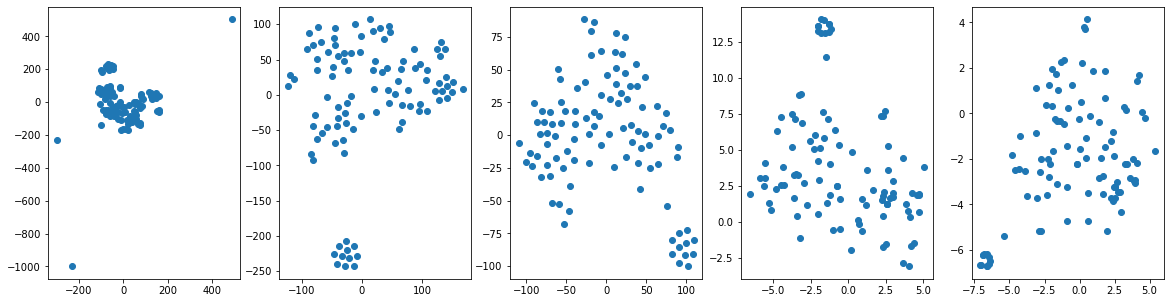

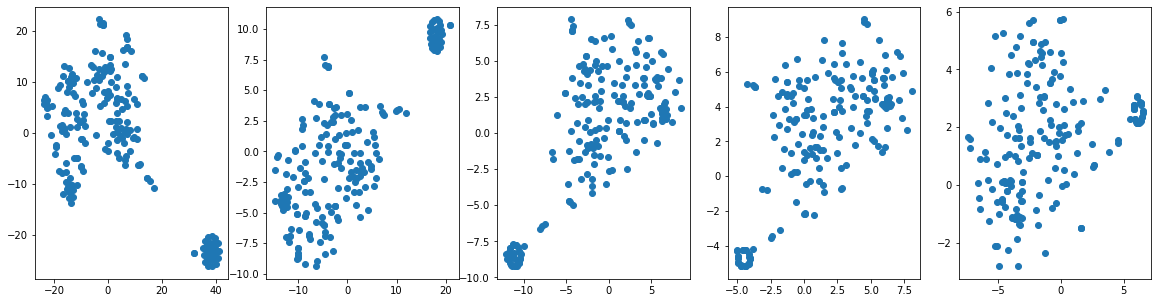

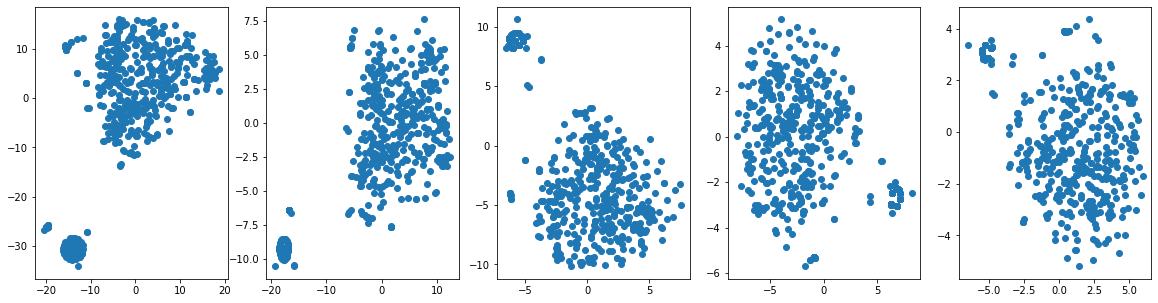

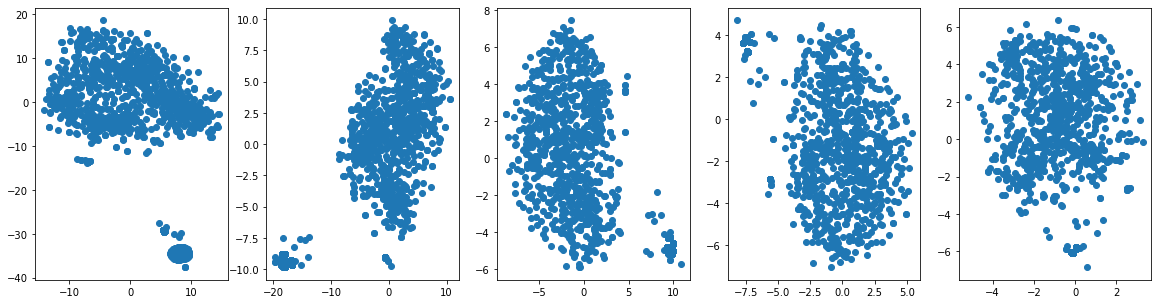

In [75]:
# TSNE Plots
fracs = [.05,.1,.15,.2,.25]
for i in [50, 100, 200, 500, 1000]:
    fig1, ax_tuple = plt.subplots(ncols=len(fracs), nrows = 1)
    fig1.set_size_inches(20, 5)
    for frac_i in range(len(fracs)):
        tsne = create_TSNE(df_sim_no0, i, fracs[frac_i])
        ax_tuple[frac_i].plot(tsne[:,0],tsne[:,1], "o")

In [9]:
df_sim

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879
0,0,1.000000,0.666362,0.727815,0.857744,0.768074,0.0,0.850061,0.789108,0.460402,...,0.764101,0.547689,0.731088,0.783398,0.0,0.815171,0.785245,0.687669,0.641592,0.690650
1,1,0.666362,1.000000,0.743550,0.784030,0.638032,0.0,0.724753,0.617480,0.396166,...,0.679674,0.631916,0.753379,0.761774,0.0,0.738222,0.797344,0.784427,0.630323,0.760379
2,2,0.727815,0.743550,1.000000,0.789209,0.697441,0.0,0.760134,0.677463,0.389699,...,0.674036,0.722860,0.699490,0.803678,0.0,0.803378,0.751254,0.789009,0.678477,0.748310
3,3,0.857744,0.784030,0.789209,1.000000,0.801656,0.0,0.868648,0.796767,0.440971,...,0.845640,0.681649,0.773856,0.868444,0.0,0.797301,0.795921,0.734231,0.658356,0.683836
4,4,0.768074,0.638032,0.697441,0.801656,1.000000,0.0,0.793300,0.676554,0.694152,...,0.832139,0.629608,0.814572,0.798685,0.0,0.771546,0.783231,0.758586,0.655846,0.629706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,0.815171,0.738222,0.803378,0.797301,0.771546,0.0,0.758195,0.759757,0.409190,...,0.746455,0.636147,0.766366,0.822603,0.0,1.000000,0.769355,0.793086,0.677359,0.840760
17876,17876,0.785245,0.797344,0.751254,0.795921,0.783231,0.0,0.777613,0.611541,0.428543,...,0.756237,0.579754,0.851038,0.809460,0.0,0.769355,1.000000,0.826556,0.639159,0.744382
17877,17877,0.687669,0.784427,0.789009,0.734231,0.758586,0.0,0.810372,0.626138,0.557337,...,0.712329,0.656049,0.824895,0.807276,0.0,0.793086,0.826556,1.000000,0.671144,0.773077
17878,17878,0.641592,0.630323,0.678477,0.658356,0.655846,0.0,0.718070,0.720001,0.559190,...,0.654626,0.762927,0.561305,0.675515,0.0,0.677359,0.639159,0.671144,1.000000,0.626092


In [54]:
from sklearn.cluster import KMeans
kmeans_dic = {}
errors = []
sim = df_sim
for k in range(10,11):
    kmeans_dic[k] = KMeans(k).fit(1-sim)
    errors.append(kmeans_dic[k].inertia_)

In [53]:
# TSNE Plots with color for colors
# This code is ugly. If you ask me about it, I'll probably just rewrite it instead of figuring out how it works
fracs = [.05,.1,.15,.2,.25]
labels = kmeans_dic[10].labels_[~mask]
for i in [50, 100, 200, 500, 1000]:
    fig1, ax_tuple = plt.subplots(ncols=len(fracs), nrows = 1)
    fig1.set_size_inches(20, 5)
    for frac_i in range(len(fracs)):
        tsne = create_TSNE(df_sim_no0, i, fracs[frac_i])
        labels_i = labels[:i]
        ax_tuple[frac_i].scatter(tsne[label,0], tsne[label,1], color = labels_i)
        for g in np.unique(labels):
            label = np.where(labels_i == g)
            ax_tuple[frac_i].scatter(tsne[label,0], tsne[label,1], label=g)

NameError: name 'mask' is not defined

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


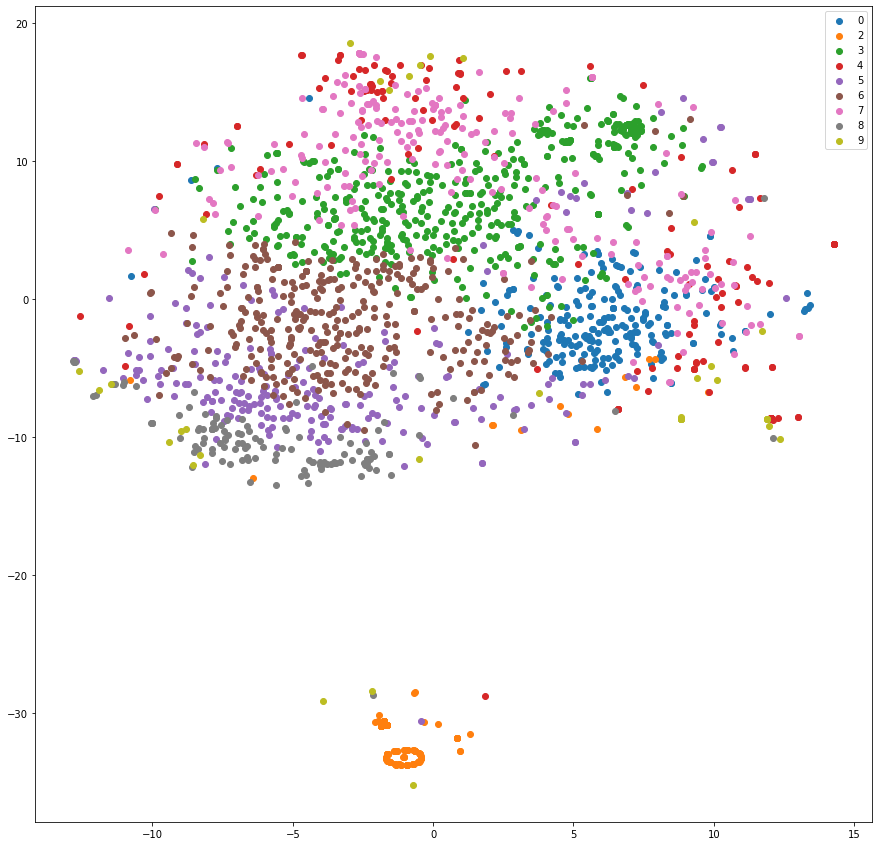

In [109]:
# TSNE Plots with color for colors
# This code is ugly. If you ask me about it, I'll probably just rewrite it instead of figuring out how it works
fracs = [.05]
labels = kmeans_dic[10].labels_[~mask]
for i in [2000]:
    fig1, ax_tuple = plt.subplots(ncols=len(fracs), nrows = 1)
    fig1.set_size_inches(15, 15)
    for frac_i in range(len(fracs)):
        tsne = create_TSNE(df_sim_no0, i, fracs[frac_i])
        labels_i = labels[:i]
        for g in np.unique(labels):
            label = np.where(labels_i == g)
            ax_tuple.scatter(tsne[label,0], tsne[label,1], label=g)
        ax_tuple.legend()

In [114]:
df[kmeans_dic[10].labels_==2]["industry"].value_counts()

Education Management                   726
Hospital & Health Care                   6
Marketing and Advertising                5
Consumer Services                        5
Telecommunications                       5
Information Technology and Services      4
Biotechnology                            2
Accounting                               2
Computer Software                        2
Leisure, Travel & Tourism                2
Internet                                 2
Real Estate                              1
Facilities Services                      1
Retail                                   1
Financial Services                       1
Logistics and Supply Chain               1
Banking                                  1
Market Research                          1
Food & Beverages                         1
Law Practice                             1
Entertainment                            1
Staffing and Recruiting                  1
Apparel & Fashion                        1
Insurance  

In [116]:
df["industry"].value_counts().head(20)

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Staffing and Recruiting                 127
Health, Wellness and Fitness            127
Insurance                               123
Name: industry, dtype: int64

In [127]:
df.loc[[int(x) for x in df_sim_no0[:2000][tsne[:,1] < -20].index]]["industry"].value_counts()

Education Management                   134
Consumer Services                        2
Information Technology and Services      1
Hospital & Health Care                   1
Name: industry, dtype: int64

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(kmeans_dic[10].labels_, df["industry"].values,discrete_features = True)

ValueError: Unknown label type: 'unknown'

In [ ]:
for n in [10,20,30,50,100,200,500,1000]:
    

ValueError: cannot convert float NaN to integer

In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
text_col = ["title", "company_profile", "description", "requirements", "benefits"]
df[text_col] = df[text_col].fillna("")
df["full_listing"] = df.apply(lambda row: "".join([entry + "\n" for entry in row[text_col]]), axis = 1)

In [4]:
print(df["full_listing"][0])

Marketing Intern
We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.
Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cur

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
df["full_listing"] = df.apply(lambda row: "".join([entry + "\n" for entry in row[text_col]]), axis = 1)
fraud = "".join(df[df["fraudulent"] == 1]["full_listing"]) 
unfraud = "".join(df[df["fraudulent"] == 0]["full_listing"]) 

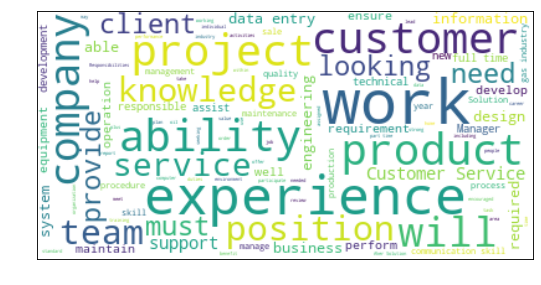

In [13]:
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fraud)
fig, (ax1) = plt.subplots(1,figsize=(8, 6), dpi=80)
plt.imshow(wordcloud1, interpolation="bilinear")
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white')

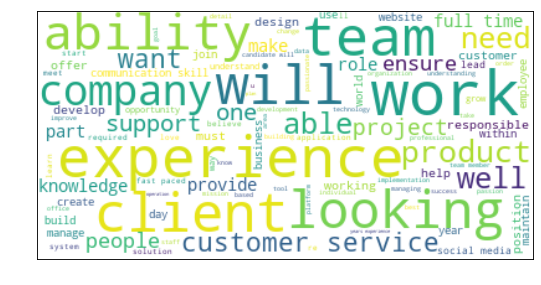

In [15]:
wordcloud0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(unfraud)
fig, (ax1) = plt.subplots(1,figsize=(8, 6), dpi=80)
plt.imshow(wordcloud0, interpolation="bilinear")
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white')

In [ ]:
df[text_col].apply(lambda x: x.apply(lambda y: len(y.split())).max())

In [ ]:
plt.boxplot(df["full_listing"].apply(lambda x: len(x.split())))
plt.plot()

In [64]:
df3 = pd.DataFrame(df["industry"].value_counts(dropna = False)).transpose()
for i in range(10):
    df3.loc[i] = df["industry"][kmeans_dic[10].labels_ == i].value_counts(dropna = False)
    

In [72]:
df3

,NaN,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications,...,Libraries,Nanotechnology,Military,Textiles,Shipbuilding,Ranching,Alternative Dispute Resolution,Sporting Goods,Museums and Institutions,Wine and Spirits
industry,4903.0,1734.0,1376.0,1062.0,828.0,822.0,779.0,497.0,358.0,342.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
0,1377.0,189.0,148.0,50.0,105.0,12.0,60.0,106.0,25.0,39.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,682.0,320.0,282.0,277.0,185.0,25.0,298.0,91.0,128.0,89.0,...,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0
2,17.0,4.0,2.0,2.0,5.0,726.0,1.0,6.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492.0,172.0,155.0,126.0,87.0,19.0,66.0,72.0,17.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,419.0,56.0,54.0,64.0,42.0,6.0,19.0,39.0,26.0,7.0,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,489.0,247.0,185.0,122.0,88.0,11.0,66.0,46.0,70.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,575.0,462.0,337.0,209.0,154.0,11.0,143.0,64.0,31.0,71.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
7,135.0,12.0,15.0,7.0,21.0,1.0,3.0,11.0,14.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,240.0,124.0,45.0,49.0,48.0,NaN,9.0,40.0,14.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
def df3lift(industry,cluster):
    n = df3[i][j]
dflifts = df3[:]
for i in range(10):
    for j in df3.columns:
        dflifts[j][i] = df3[j][i] * len(df) /(df3.loc["industry"][j]) / sum(kmeans_dic[10].labels_== i)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
dflifts

,NaN,Information Technology and Services,Computer Software,Internet,Marketing and Advertising,Education Management,Financial Services,Hospital & Health Care,Consumer Services,Telecommunications,...,Libraries,Nanotechnology,Military,Textiles,Shipbuilding,Ranching,Alternative Dispute Resolution,Sporting Goods,Museums and Institutions,Wine and Spirits
industry,4903.000000,1734.000000,1376.000000,1062.000000,828.000000,822.000000,779.000000,497.000000,358.000000,342.000000,...,2.000000,2.000000,2.000000,2.000000,1.00000,1.00000,1.00000,1.000000,1.00000,1.00000
0,1.863291,0.723138,0.713595,0.312359,0.841333,0.096854,0.511002,1.415006,0.463304,0.756567,...,3.317254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.734085,0.973924,1.081570,1.376510,1.179140,0.160506,2.018845,0.966294,1.886909,1.373371,...,NaN,NaN,2.638725,2.638725,NaN,5.27745,5.27745,NaN,NaN,5.27745
2,0.078375,0.052144,0.032855,0.042569,0.136499,19.964380,0.029017,0.272889,0.315702,0.330472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.904790,0.894384,1.015683,1.069771,0.947401,0.208414,0.763926,1.306234,0.428165,1.370951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.016641,NaN,NaN
4,1.328684,0.502121,0.610162,0.936969,0.788658,0.113488,0.379215,1.220051,1.129172,0.318230,...,NaN,15.547826,NaN,7.773913,NaN,NaN,NaN,NaN,NaN,NaN
5,0.950565,1.357633,1.281410,1.094889,1.012948,0.127543,0.807497,0.882137,1.863587,0.696704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.720082,1.635946,1.503791,1.208364,1.142001,0.082167,1.127132,0.790678,0.531685,1.274701,...,3.070055,NaN,NaN,NaN,6.14011,NaN,NaN,NaN,6.14011,NaN
7,1.588099,0.399152,0.628751,0.380171,1.462833,0.070167,0.222121,1.276563,2.255542,NaN,...,NaN,NaN,28.838710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.050683,1.534953,0.701967,0.990362,1.244324,NaN,0.247986,1.727532,0.839397,1.255239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for token in nlp("I am the walrus"):
    print(token.vector)

[-0.59314746 -0.9909744  -0.52652067 -1.7789832   0.03042758 -1.0894095
 -0.84922093  0.6946671   1.2303545  -1.304705    0.02926411 -0.23247053
 -0.84107006  0.07699168 -1.5259807  -0.5364366  -0.2548573   0.79543686
  1.0216781  -0.21836922 -0.0671563  -0.6857965   0.63456553 -1.185283
  2.478097    1.0246536   0.20758444 -1.30747     0.02855802  1.3651586
 -0.32208732  0.10141397  0.23775972  0.33284372 -0.2562443   0.49739093
 -0.9409336  -0.37962645 -0.3574641  -0.188297   -0.28235775  1.6629763
  2.0721219   0.11334956 -0.3974943  -0.86835504  1.4573631  -0.28652462
 -0.5663197  -0.49588418 -0.25223526 -1.5474159   0.46381414 -0.4689929
 -0.7714194   1.40611     2.240338    1.6730479  -0.01816356 -0.44672802
 -0.32567152  0.11242801  0.77669823  0.77052355  0.09272197 -0.7348483
 -0.57708585 -0.56922275  1.6704814   0.21149853  0.38171822 -0.42303926
 -0.7392983  -1.8233413   1.5985459  -1.3156621  -0.30645007 -0.68419397
  0.01431543  2.1063507   1.4832712  -0.23119381 -0.221509

In [9]:
df_alt = pd.read_csv("fj.csv")

In [22]:
print(df.iloc[11]["company_profile"])

Want to build a 21st century financial service?We're convinced that that there is a need for innovation in financial services and that current banks will not be the ones providing this. Instead this innovation will come from companies like TransferWise and we're on a hunt for great minds who think like we do.


In [24]:
df[df["company_profile"] == df.iloc[11]["company_profile"]]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
11,12,Talent Sourcer (6 months fixed-term contract),"GB, LND, London",HR,NaN,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,We’re looking for someone who:Proven track rec...,You will join one of Europe’s most hotly tippe...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
184,185,Growth Wunderkind (paid internship),"GB, LND, London",Development,NaN,Want to build a 21st century financial service...,We're looking for a talented Growth Wunderkind...,"Must haves:Entrepreneurial, passionate about b...",You will join one of Europe’s most hotly tippe...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
348,349,Community Ambassador German-speaking (Remote),"DE, , Germany",Marketing,NaN,Want to build a 21st century financial service...,"TransferWise, co-founded by Skype’s first empl...","Are you a dynamic, motivated, outgoing network...",NaN,0,1,0,NaN,NaN,NaN,NaN,Marketing,0
432,433,Android Developer,"GB, LND, London",Development,NaN,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,We're looking for somebody to:Own development ...,Apart from a competitive salary and all-expens...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
524,525,Senior Java engineer,"EE, 37, Tallinn",Development,NaN,Want to build a 21st century financial service...,TransferWho?Co-founded by Skype’s first employ...,What skills do I need? At least 8 years of han...,TransferWise prides itself on being a fun and ...,0,1,1,Full-time,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,16084,General Manager Europe (Mobile),"GB, LND, London",Marketing,NaN,Want to build a 21st century financial service...,"TransferWise is a VC-backed, international mon...",We're looking for somebody to:Build out a team...,Apart from all-expenses-paid company holidays ...,0,1,0,NaN,NaN,NaN,NaN,Marketing,0
16297,16298,Engineering Lead,"EE, 37, Tallinn",Development,NaN,Want to build a 21st century financial service...,TransferWho?TransferWise is the clever new way...,We're looking for somebody to- Nurture an agil...,You will join one of Europe’s most hotly tippe...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
16514,16515,Digital Marketing Executive,"GB, , London",Marketing,NaN,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,The roleReporting to the Head of Performance M...,Apart from all-expenses-paid company holidays ...,0,1,1,Full-time,Mid-Senior level,NaN,Financial Services,Marketing,0
17142,17143,Research and policy intern,"GB, LND, London",PR,NaN,Want to build a 21st century financial service...,"About the companyTransferWise is a VC-backed, ...",Requirements - must haves:Research experience....,NaN,0,1,1,Full-time,Internship,Bachelor's Degree,Public Policy,Research,0


In [25]:
df[df["fraudulent"] == 1]["company_profile"].value_counts().mean()

5.6938775510204085

In [26]:
df[df["fraudulent"] == 0]["company_profile"].value_counts().mean()

8.610240963855421

In [28]:
df["fraudulent"]

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [52]:
fraud_description = df[df["fraudulent"] == 1]["company_profile"].dropna().iloc[14]

In [53]:
df[df["company_profile"] == fraud_description]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
843,844,Technical & Customer Support Associates,"US, PA, Philadelphia",CSA REP,23000-32000,The Accion story began more than 100 years ag...,Interface with customers via inbound or outbou...,Knowledge of basic computer operationsWillingn...,Excellent BenefitsStrong Performance Incentive...,0,1,1,Full-time,Associate,High School or equivalent,Financial Services,Customer Service,1
845,846,Service Associate,"US, TX, AUSTIN",SERVICE-REP,25000-30000,The Accion story began more than 100 years ag...,Accion is currently seeking a professional in...,1 year applicable retail/customer service work...,"401k , healthcare program,dental insurance, li...",0,1,1,Full-time,Entry level,High School or equivalent,Retail,Customer Service,1
4578,4579,Service Associate,"US, TX, Arlington",Financial Dept,28000-35000,The Accion story began more than 100 years ag...,"Welcome and greet customers, modeling a...",...,"401K, HEALTH CARE PLAN , DENTAL , LIFE INSURAN...",0,1,1,Full-time,Entry level,High School or equivalent,Financial Services,NaN,1
4593,4594,Code Compliance Officer,"US, OK, Oklahoma City",NaN,NaN,The Accion story began more than 100 years ag...,: Responsible for the enforcement of the build...,Work requires knowledge of a specific vocation...,"Compensation:• Salary 40,000-50,000 annually •...",0,1,1,Full-time,Entry level,High School or equivalent,Public Safety,Public Relations,1
4594,4595,MAIL CLERK,"US, TX, Austin",MAIL UNIT 65036,23000-28000,The Accion story began more than 100 years ag...,This position is located in Office Operations ...,Candidates must demonstrate the KSAs below:1. ...,Working for the ACCION offers a comprehensive ...,0,1,1,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,1
4599,4600,Mortgage Customer Service Coordinator (Call Ce...,"US, TX, DALLAS",Mortgage,45000-65000,The Accion story began more than 100 years ag...,Answer approximately 75 incoming customer call...,"Basic Qualifications - A Bachelor’s degree, WI...",ALL FULLTIME BENEFITS,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Customer Service,1
4605,4606,Collection Representative II,"US, TX, DALLAS",COLLECTION DEPT,30000-45000,The Accion story began more than 100 years ag...,The individual occupying this position must be...,Maintain attention and concentration for exten...,FULL- TIME BENEFITS,0,1,1,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service,1
4607,4608,CALL CENTER REP,"US, TX, DALLAS",CALLCENTER,30000-45000,The Accion story began more than 100 years ag...,Our Call Center Rep would be expected to be ex...,The qualifications for this position ensure yo...,"100% coverage of dental, vision and life insur...",0,1,1,Full-time,Associate,High School or equivalent,Financial Services,Customer Service,1
6500,6501,CENTER MANAGER,"US, PA, PHILADELPHIA",Financial Dept,40000-65000,The Accion story began more than 100 years ag...,The Center Manager must establish and maintain...,"High school graduate, GED or equivalent traini...","Social Security, Tax Saver Program (Section 1...",0,1,1,Full-time,Entry level,High School or equivalent,Retail,Management,1
6505,6506,SECURITY OFFICER,"US, TX, AUSTIN",SECURITY,28000-32000,The Accion story began more than 100 years ag...,Monitors an extensive camera system that provi...,High School diploma or GED. One (1) year relat...,FULLTIME BENEFITS,0,1,1,Full-time,Entry level,High School or equivalent,Security and Investigations,Customer Service,1


In [54]:
print(fraud_description)

The Accion  story began more than 100 years ago in the Austin,Tx with one family owned establishment. Today, Accion  has grown into a nationwide Organazation with over 260 stores. Accion success is attributed to our unique niche in the market offering current   finance option at competitive prices paired with customer service and a personal shopping experience. Join the Accion story today!


In [4]:
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [20]:
pd.read_csv("fj.csv")["word_count"]

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,NAN Columns,title_na,company_profile_na,description_na,requirements_na,benefits_na,posting,char_count,word_count,stopword_count
0,0,1,Marketing Intern,"US, NY, New York",Marketing,MISSING,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,MISSING,...,4,0,0,0,0,1,"marketing intern marketing we're food52, and w...",2716,388,141
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,MISSING,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,2,0,0,0,0,0,customer service - cloud video production succ...,6207,910,345
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",MISSING,MISSING,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,MISSING,...,8,0,0,0,0,1,commissioning machinery assistant (cma) missin...,2687,365,147
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,MISSING,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,1,0,0,0,0,0,account executive - washington dc sales our pa...,5527,717,233
4,4,5,Bill Review Manager,"US, FL, Fort Worth",MISSING,MISSING,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,2,0,0,0,0,0,bill review manager missing spotsource solutio...,4036,482,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,MISSING,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,...,2,0,0,0,0,0,account director - distribution sales vend is...,5371,868,384
17876,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,MISSING,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,1,0,0,0,0,0,payroll accountant accounting weblinc is the e...,4815,665,239
17877,17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",MISSING,MISSING,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,MISSING,...,7,0,0,0,0,1,project cost control staff engineer - cost con...,2864,379,127
17878,17878,17879,Graphic Designer,"NG, LA, Lagos",MISSING,MISSING,MISSING,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,...,3,0,1,0,0,0,graphic designer missing missing nemsia studio...,1309,208,81
